## Downside measures

**Semi-deviation:** volatility of the sub-sample of below-average or below-zero returns. It is the same as volatility, but you only take those returns instead of all of them. It is a way to measure how bad your losses can be.

**Value at risk (VaR):** maximum expected loss over a given time period. For this, you also need to specify a confidence interval. In order to obtain the VaR, you should go to the return distibution and see what is the worst loss (the extremal point) for the chosen confidence interval. VaR is given as a positive number.

**Conditional VaR:** expected loss _beyond_ VaR:

$$CVaR = - E(R | R \leq -VaR)  = \frac{\int_{-\infty}^{-VaR} x\cdot f_{R}(x) dx}{F_{R}(-VaR)}$$

where $f_{r}$ is the probability density of the distribution, and $F_{R}$ is the cumulative probability distribution. Remember that CVaR is also a positive quantity (hence the minus signs)

## Estimating VaR

There are at least four standard methods for calculating VaR:
  
  - Historical (non parametric)
  - Variance-covariance (parametric gaussian)
  - Parametric non gaussian
  - Cornish-Fisher (semi parametric)
  
All of them have their pros and cons

#### Historical methodology

The VaR is calculated based on the distribution of historial changes in the value of the current portfolio under market prices over the specified historical observation window. It is basically focusing on the extremal values that lie outside or confidence interval (usually the extremal 1% or 5%, i.e the 1-th or 5-th percentile).

The pro is that you are not making any assumption. The con is that the estimate you are making of the VaR will depend a lot on the period you are studying.


#### Parametric gaussian methodology

Calculation of VaR based on portfolio volatility. It considers the $\alpha$ quantile of the standard normal distribution ($\mu = 0$ and $\sigma = 1$, look it up on Google). For example, the 5% (actually, 4.95%) quantile of the distribution, that is the furthest 5% of the distribution from the mean, starts at x = -1.65. If we do the math, the VaR given by this methodology is 


$$ VaR _{\alpha} = -(\mu + x_{a}\sigma) $$

However, remember that gaussian assumptions for assets are NOT very good, so you might understate the real risk.

#### Parametric non-Gaussian VaR

Parametric is good because it mitigates the problem of estimation risk at the cost of model risk. This means that we have to look for a suitable model, that is, usually a non-gaussian parametric.

There are plenty of them, but we will not go over them right now.

#### Cornish-Fisher VaR / Semi-parametric approach

The following expansion allows you to relate the $\alpha$-quantile of a non-Gaussian distribution to the same quantile of a Gaussian distribution. In some sense, you could say it is a correction that allows us to use the same formula for the VaR that we had before:


$$ z^{'}_{\alpha} = z_{\alpha} + \frac{1}{6}(z^{2}_{\alpha}-1)S + \frac{1}{24}(z^{3}_{\alpha} - 3z_{\alpha})(K-3) - \frac{1}{36}(2z^{3}_{\alpha}-5z_{\alpha})S^{2}$$

$$ VaR_{\alpha} = -(\mu + z^{'}_{\alpha}\sigma) $$


In general, this is one of the best approaches to evaluate the VaR because it recognizes the non-normality of the assets, but it does not force a certain distribution either.




## Downside measures (lab)

In [3]:
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
hfi = erk.get_hfi_returns()



#### Semideviation

In [5]:
hfi.std(ddof=0) # this was the deviation for all assets

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [6]:
erk.semideviation(hfi) # this function only takes into account negative returns of each asset

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

#### VaR and CVaR

We are going to work with all the methods we mentioned before, except the Parametric non-Gaussian VaR.

In order to do calculate the historical VaR, we need some way to obtain the percentiles. Fortunately, there is a function in numpy that does it for us, which is np.percentile. 

In [7]:
import numpy as np

In [8]:
np.percentile(hfi, 5, axis=0) 
# percentile 5, axis= 0 means that it will run on columns


array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

As you can see, when we run np.percentile on a DataFrame, it returns an array. For this reason, we developed a function that runs np.percentile if the object type is a Series, but if it is a DataFrame, it will run "aggregate" first. This way, the percentiles will be returned as a Series themselves:

In [9]:
erk.var_historic(hfi,per=5)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

Let's work nw with Gaussian parametric. For this matter, we will use norm.ppf, which gives the $\alpha$-quantile of a normal distribution.

In [10]:
from scipy.stats import norm

In [11]:
norm.ppf(0.5) #This would be the centered point (the mean) which for a standard 
#gaussian, is 0.

0.0

As we have seen, Gaussian VaR is given by $  -(\mu + x_{a}\sigma) $, so the code to obtain the VaR in this case is pretty simple (we will add it to our toolkit). Remember that in this case, we must be a *quantile*, not a *percentile*.

In [12]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

And for the Cornish Fisher we can build another function with the modified/corrected value of the quantile (Z-score):

In [21]:
erk.var_cornish_fisher(hfi)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

Let's gather all the VaR's:

,Historic,Gaussian,Cornish-Fisher
Convertible Arbitrage,0.01576,0.021691,0.025166
CTA Global,0.03169,0.034235,0.033094
Distressed Securities,0.01966,0.021032,0.025102
Emerging Markets,0.04247,0.047164,0.053011
Equity Market Neutral,0.00814,0.008850,0.010734
Event Driven,0.02535,0.021144,0.025516
Fixed Income Arbitrage,0.00787,0.014579,0.017881
Global Macro,0.01499,0.018766,0.013581
Long/Short Equity,0.02598,0.026397,0.027935
Merger Arbitrage,0.01047,0.010435,0.012612


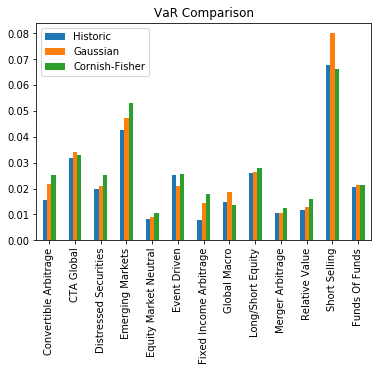

In [28]:
erk.var_comparison(hfi,plot=True)

As you can see, the difference between all three is not extremely big, and none of them is always bigger is smaller than the rest. However, it is true that in most cases, at least for these assets, the Cornish-Fisher VaR is a bit higher.

#### CVaR

Remember that CVaR is just the average of all those returns worse than the VaR. Knowing this, calculating the CVaR is pretty simple once you have the VaR. We will skip the simple functions and go directly to the function cvar_comparison. All the functions for the CVaR have the same name as for the var, but instead of var, you should write "cvar":

,Historic,Gaussian,Cornish-Fisher
Convertible Arbitrage,0.036550,0.049687,0.058200
CTA Global,0.041264,0.043527,0.042000
Distressed Securities,0.036429,0.040864,0.055600
Emerging Markets,0.072364,0.083820,0.092488
Equity Market Neutral,0.016879,0.018292,0.021044
Event Driven,0.038336,0.037440,0.039331
Fixed Income Arbitrage,0.028257,0.052500,0.052500
Global Macro,0.020629,0.025783,0.019244
Long/Short Equity,0.041943,0.043162,0.044558
Merger Arbitrage,0.019143,0.019143,0.023400


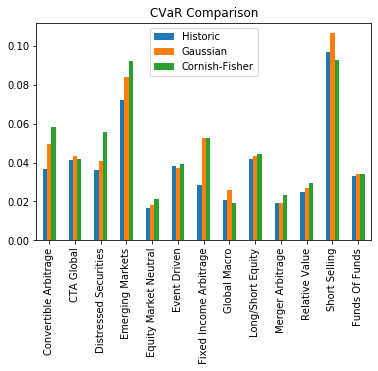

In [36]:
erk.cvar_comparison(hfi,plot=True)
     

We could arrive to the same conclusions for CVaR.